# Sparse Hebbian Learning : reproducing SparseNet

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [2]:
from shl_scripts import SHL
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 1, 0
N_scan = 7

## With diferent learning rates but without homeostasis

Here,we only ensure the norm ofthe filters is constant.

In [3]:
shl = SHL()
data = shl.get_data()
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    matname = 'no homeo - eta={}'.format(eta)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, eta_homeo=0,
              eta=eta, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname)

## Homeostasis à-la-SparseNet

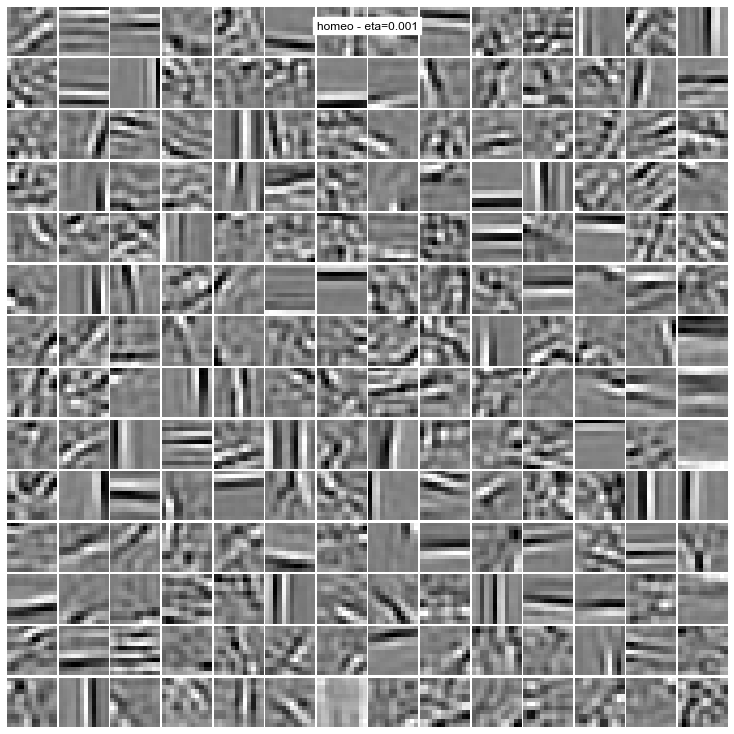

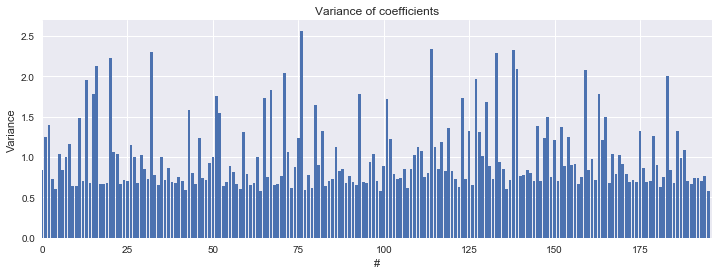

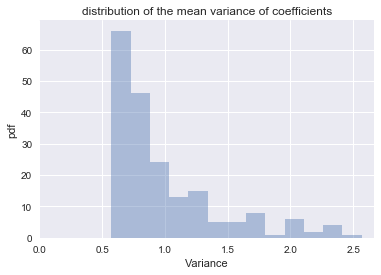

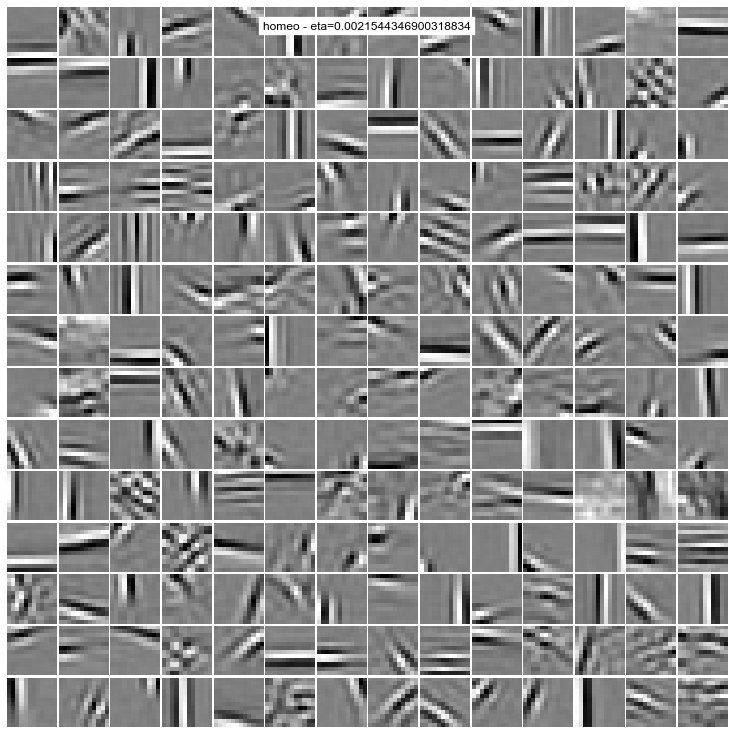

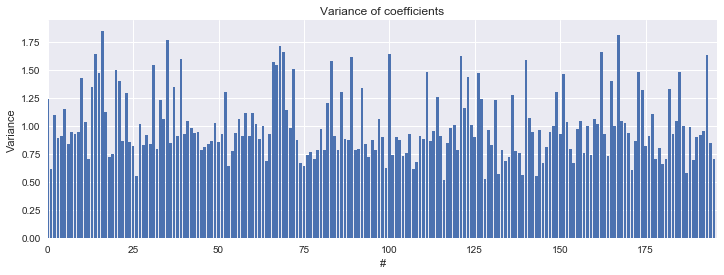

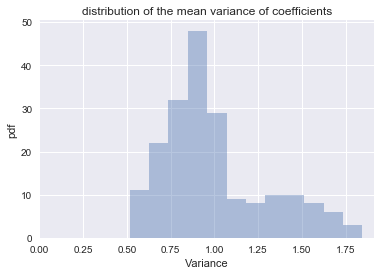

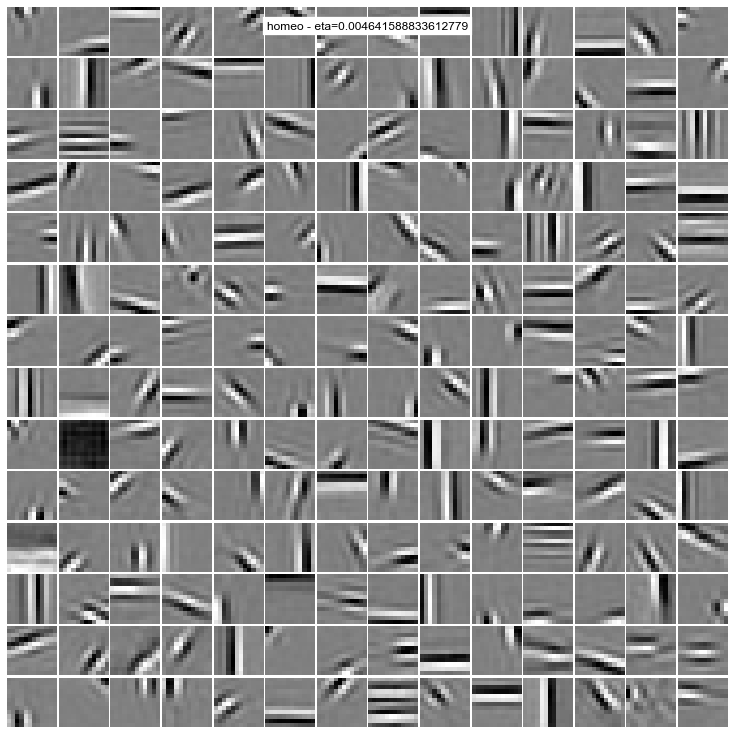

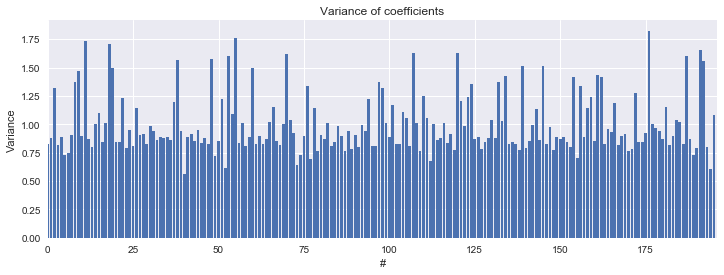

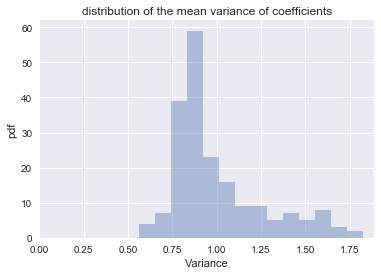

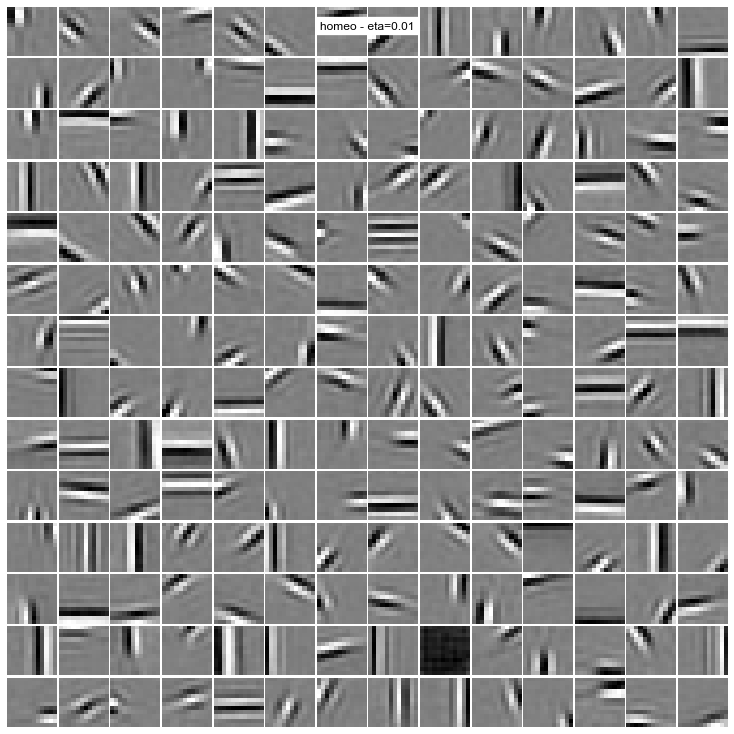

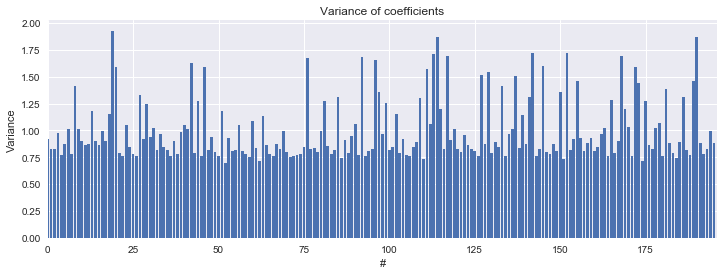

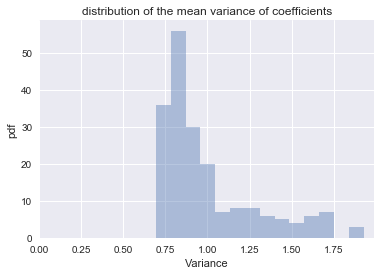

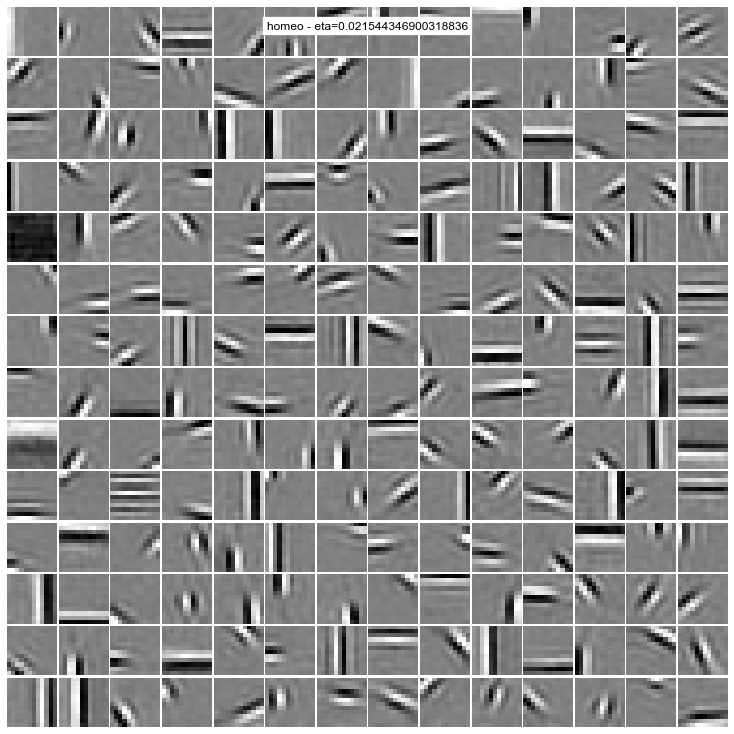

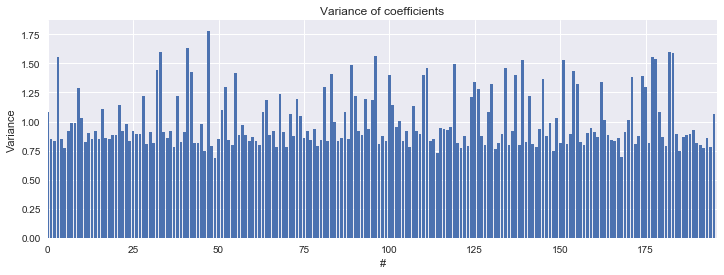

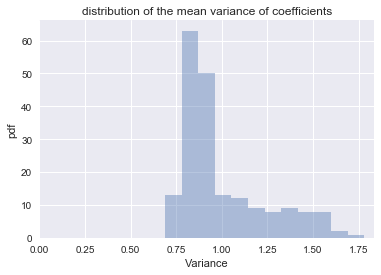

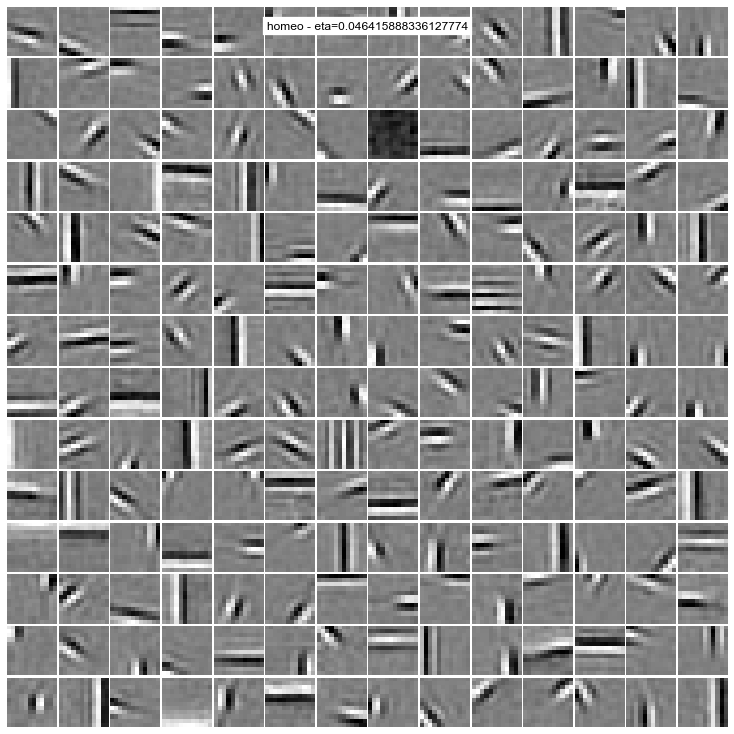

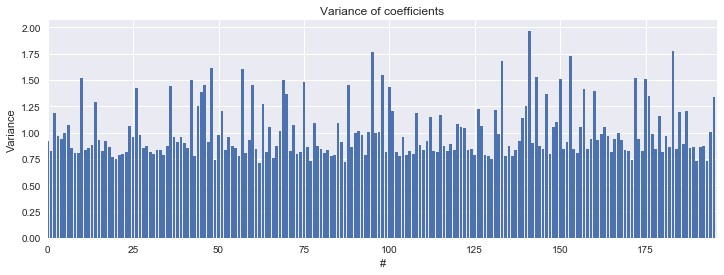

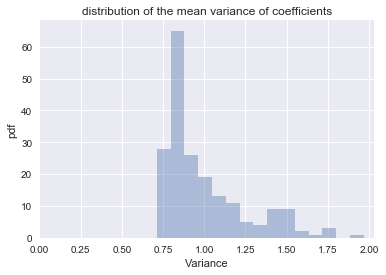

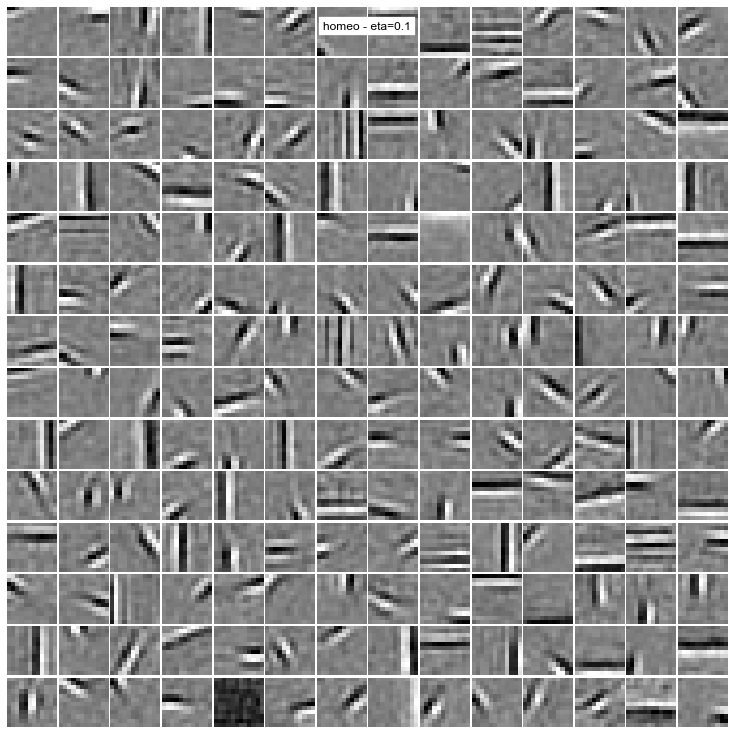

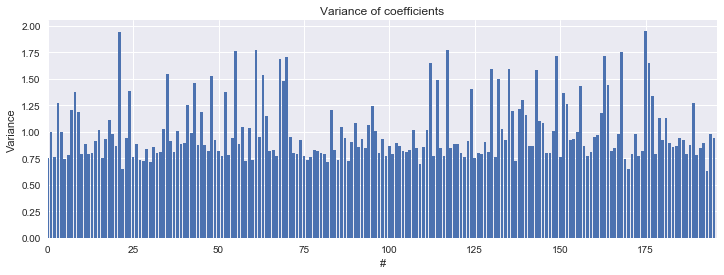

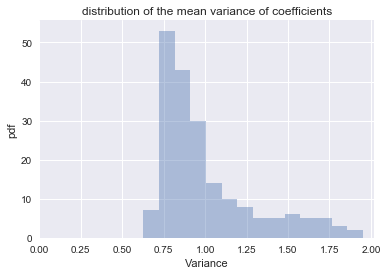

In [4]:
shl = SHL()
data = shl.get_data()
for eta in np.logspace(-1, 1, N_scan, base=10)*shl.eta:
    matname = 'homeo - eta={}'.format(eta)
    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', eta=eta, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname)
    
    fig, ax = dico.show_dico(title=matname)
    fig.show()
    fig, ax = dico.plot_variance(data)
    fig.show()
    fig, ax = dico.plot_variance_histogram(data)    
    fig.show()    

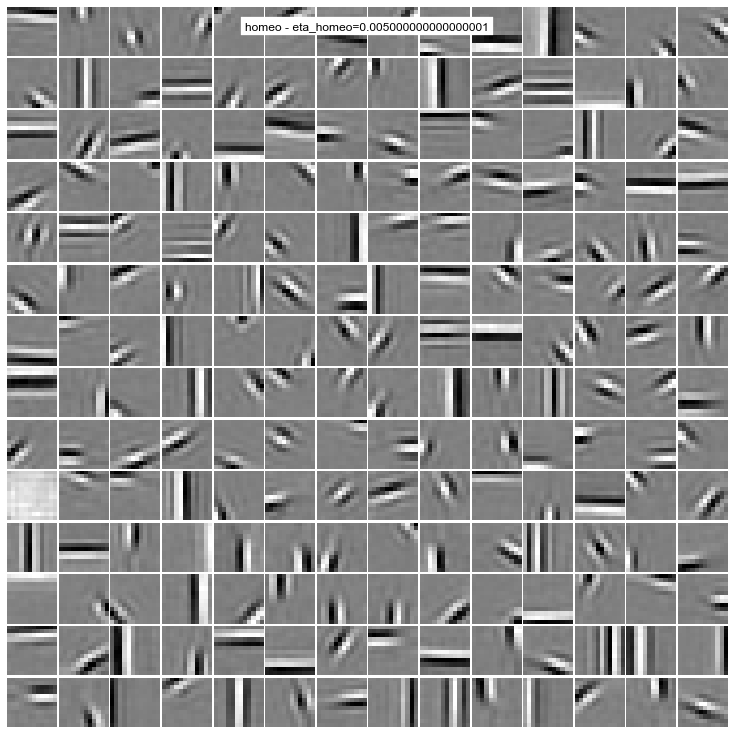

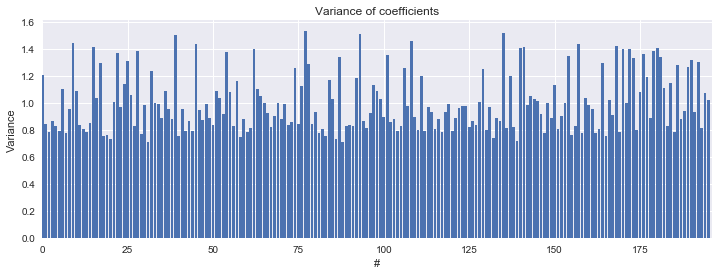

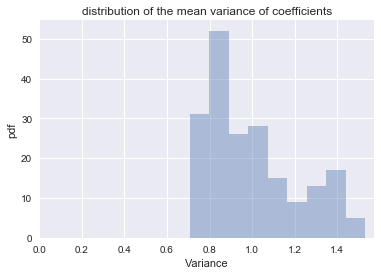

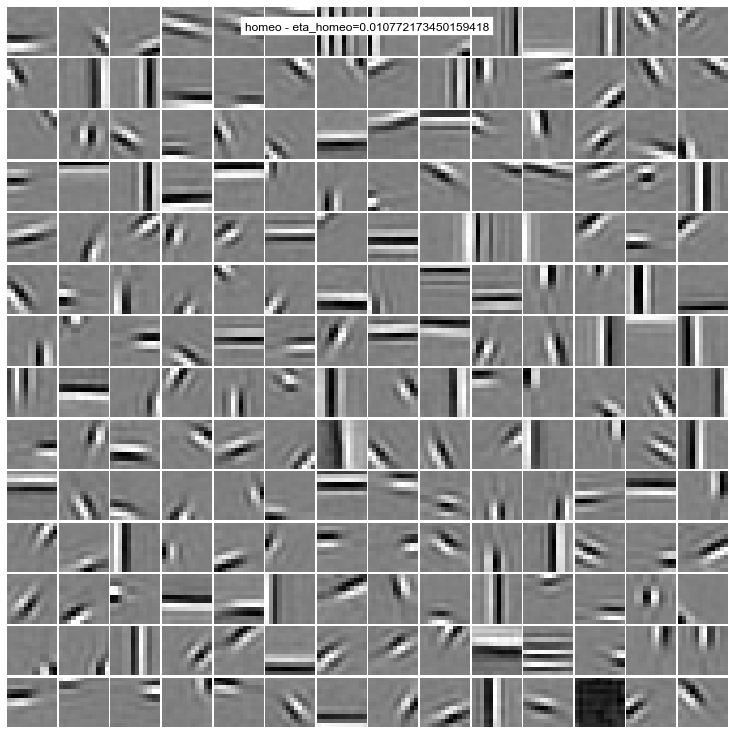

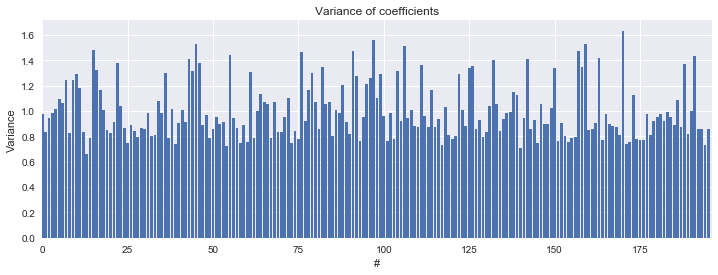

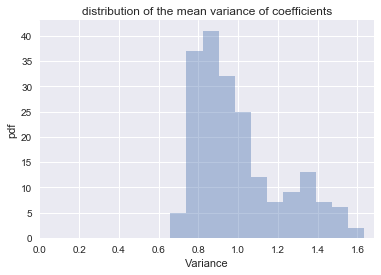

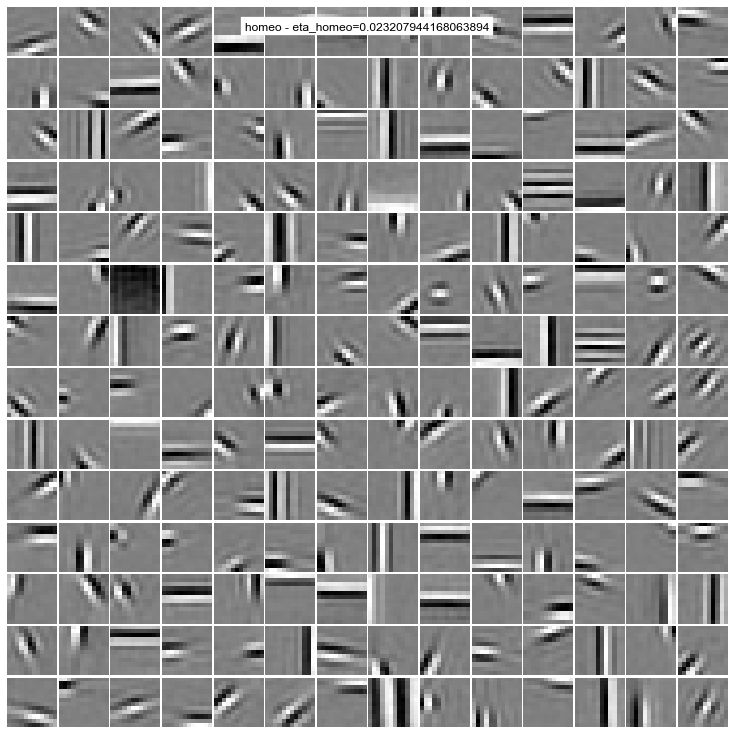

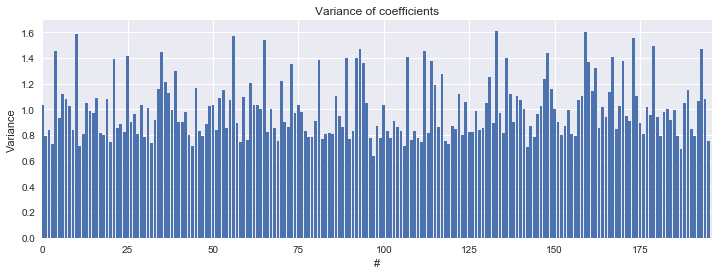

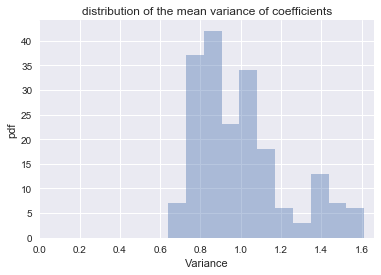

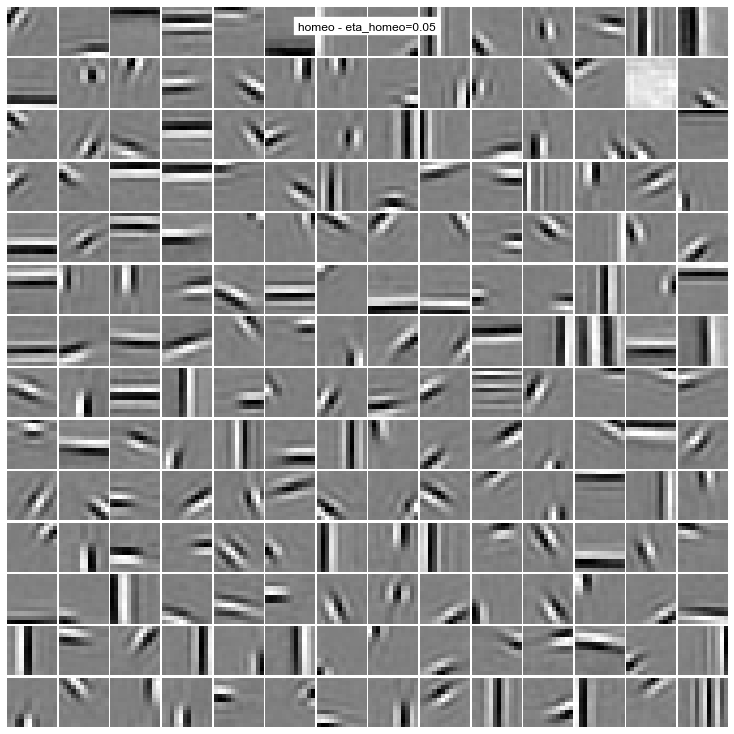

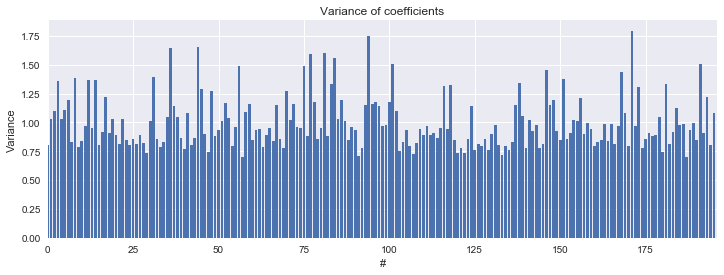

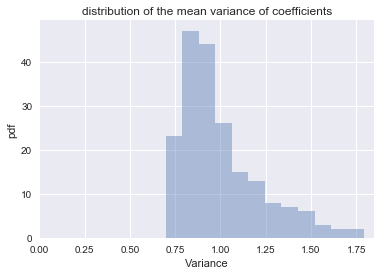

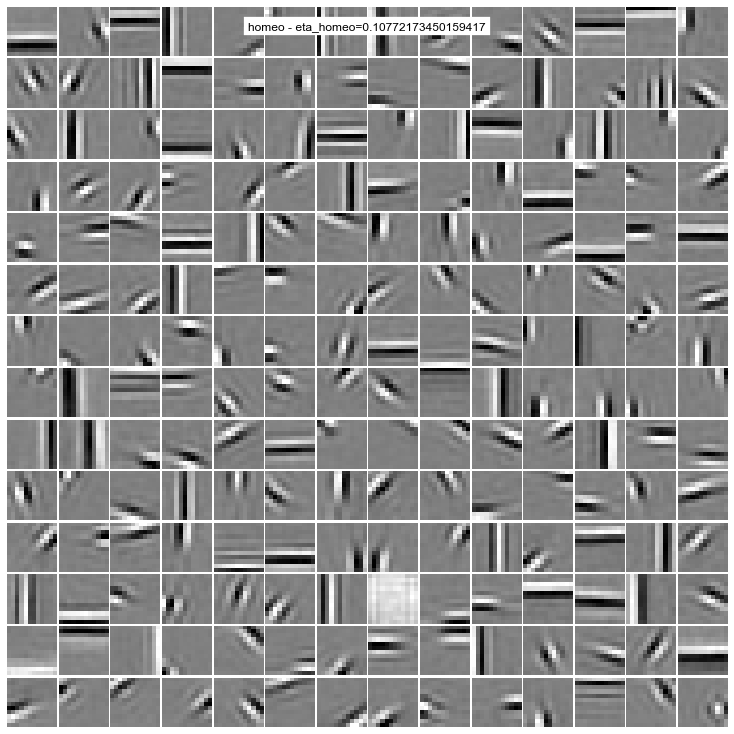

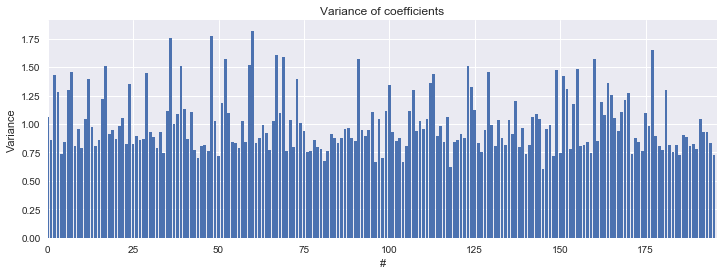

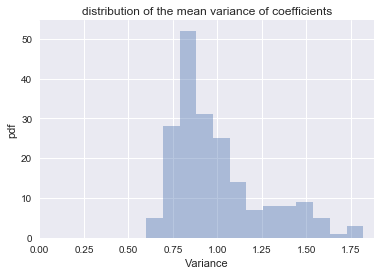

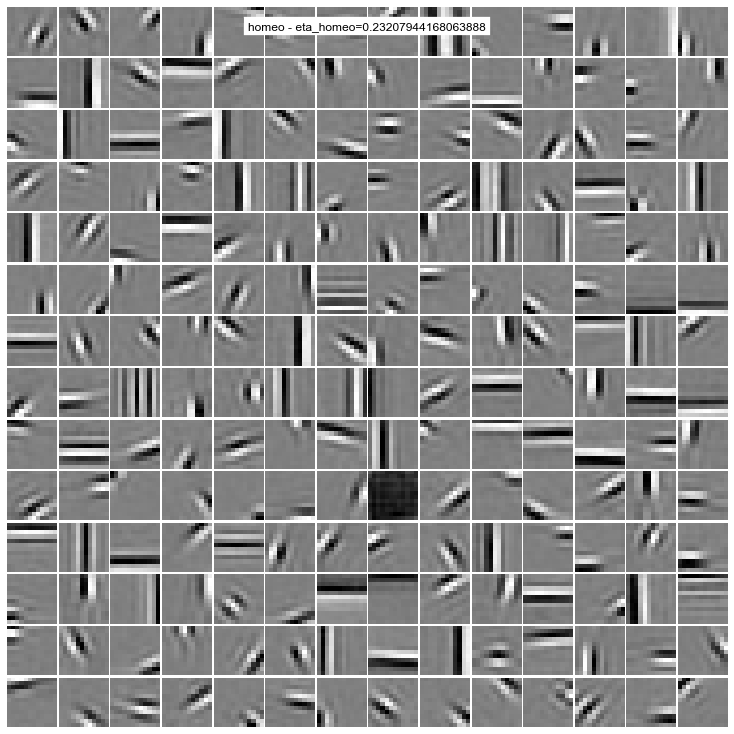

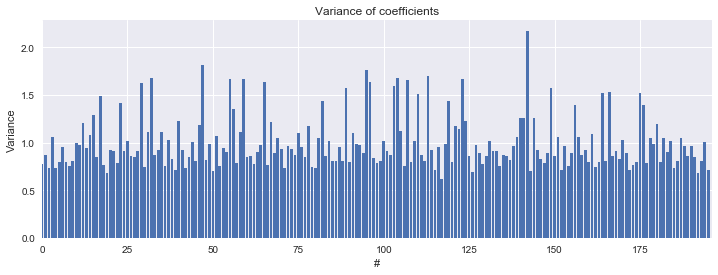

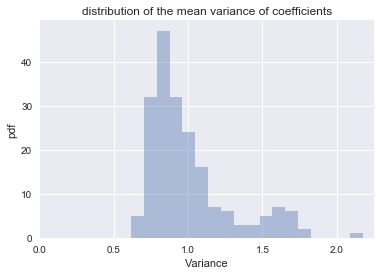

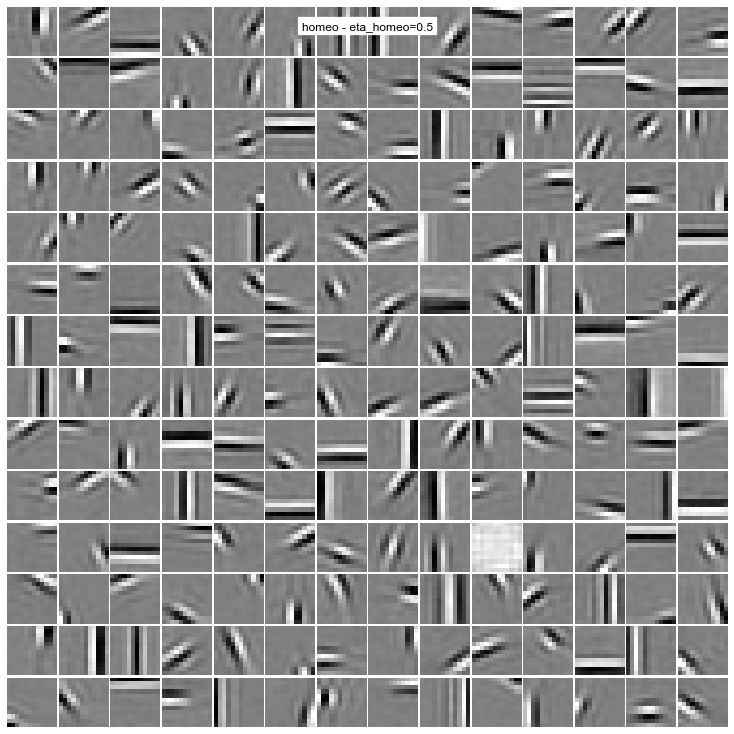

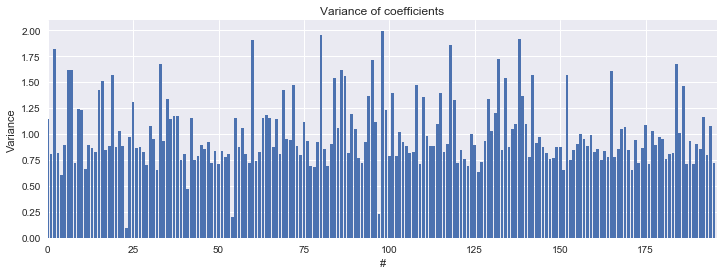

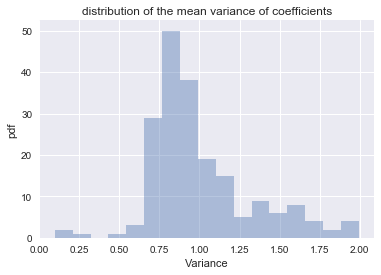

In [5]:
shl = SHL()
data = shl.get_data()
for eta_homeo in np.logspace(-1, 1, N_scan, base=10)*shl.eta_homeo:
    matname = 'homeo - eta_homeo={}'.format(eta_homeo)

    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', eta_homeo=eta_homeo, verbose=verbose)
    dico = shl.learn_dico(data=data, matname=matname)

    fig, ax = dico.show_dico(title=matname)
    fig.show()
    fig, ax = dico.plot_variance(data)
    fig.show()
    fig, ax = dico.plot_variance_histogram(data)    
    fig.show()    

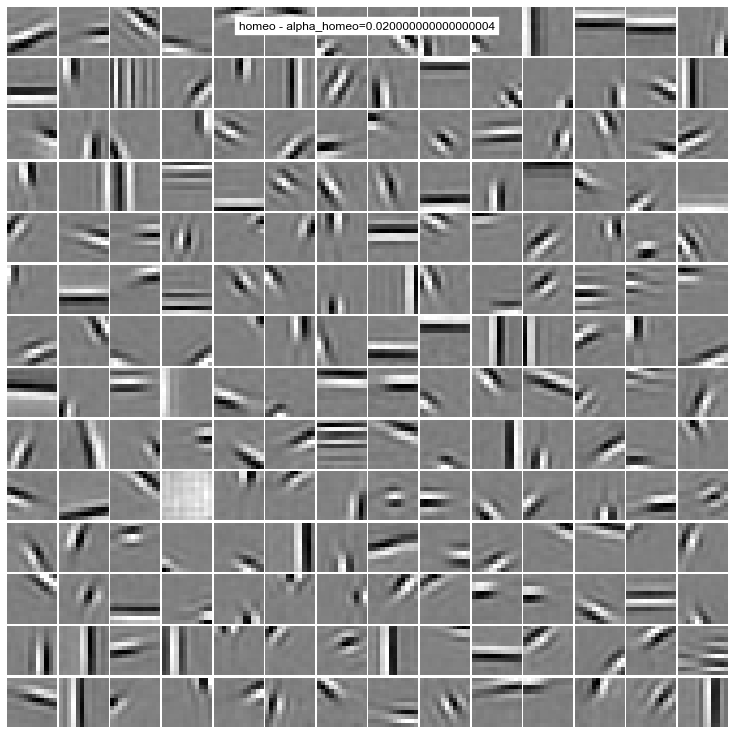

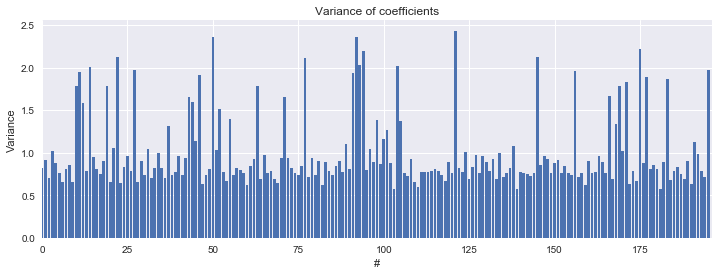

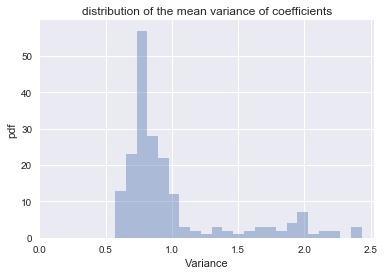

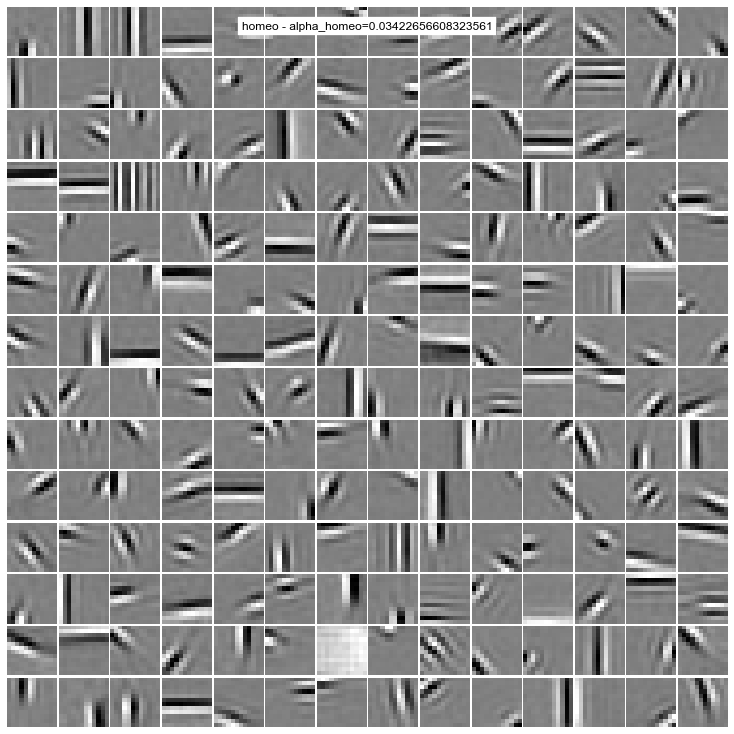

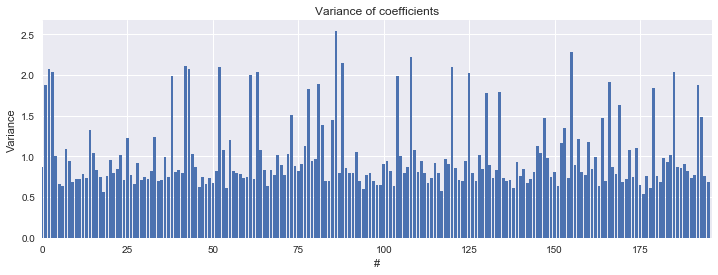

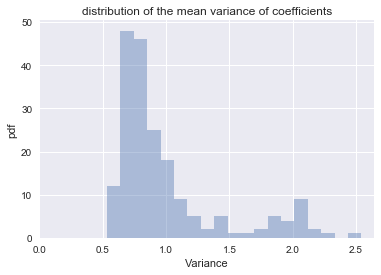

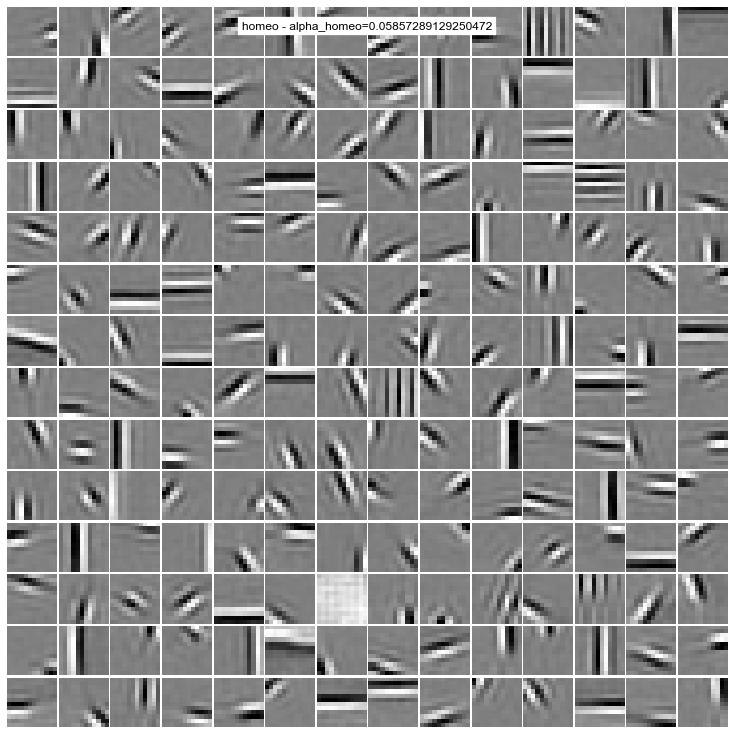

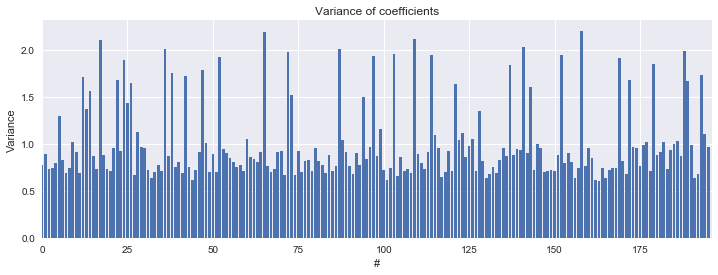

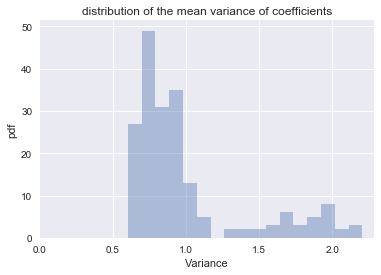

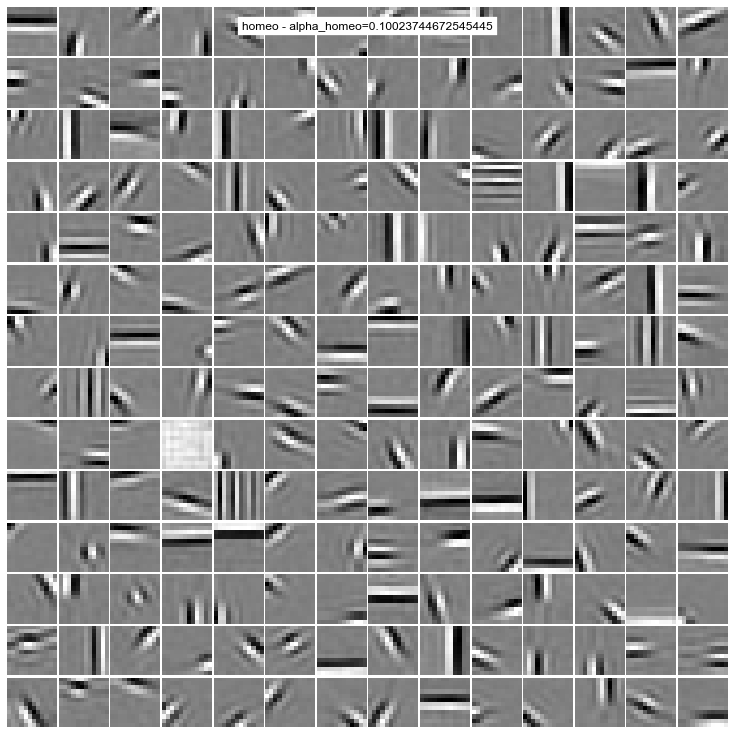

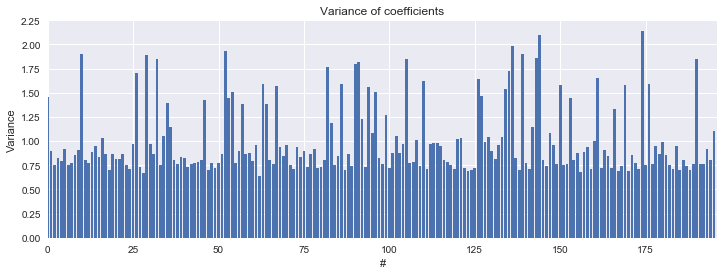

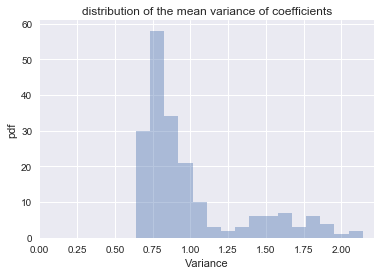

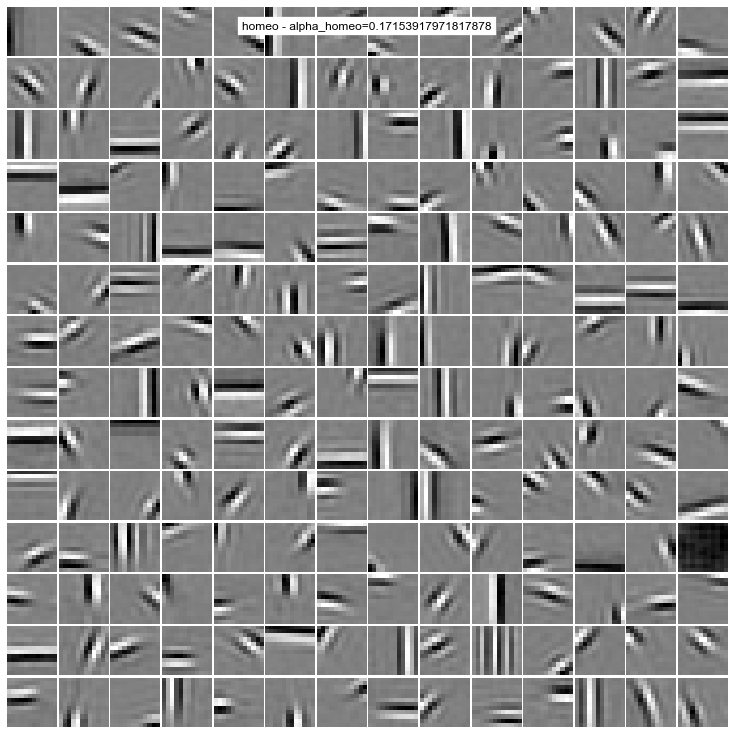

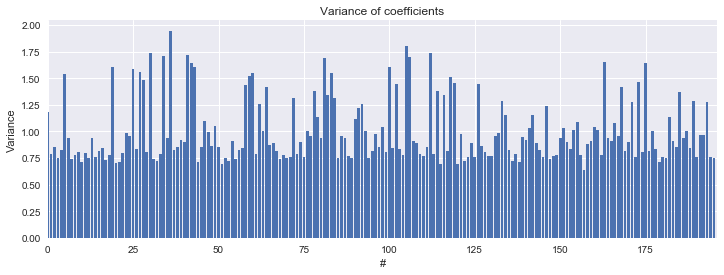

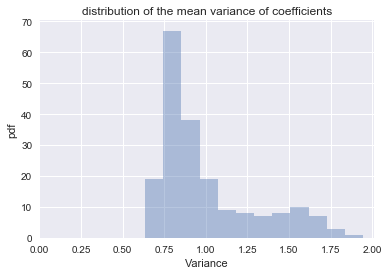

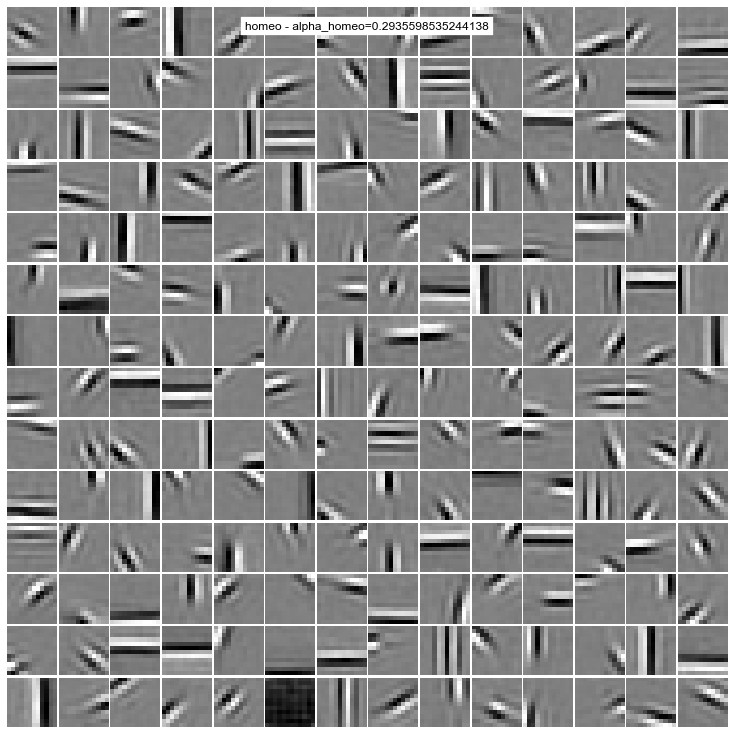

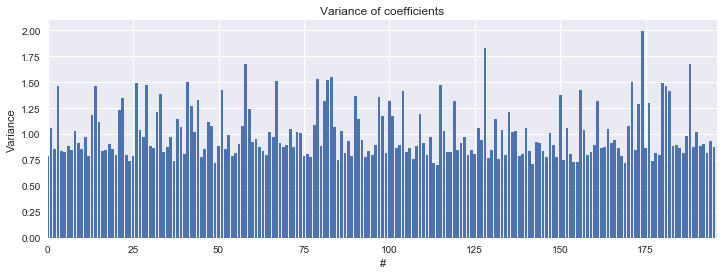

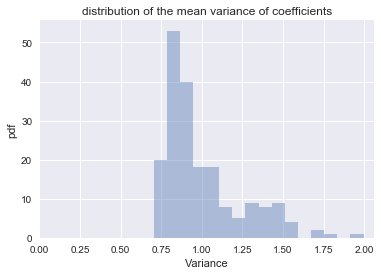

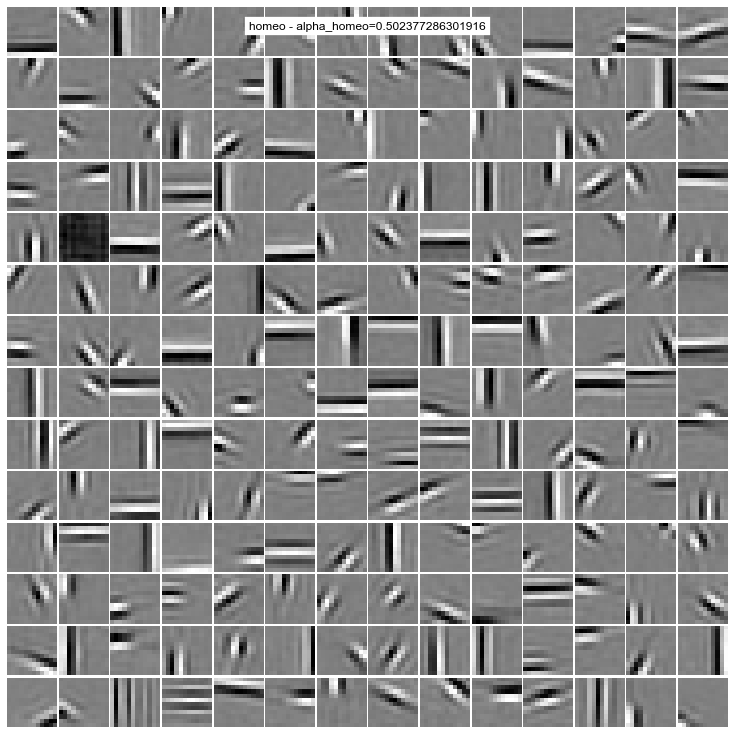

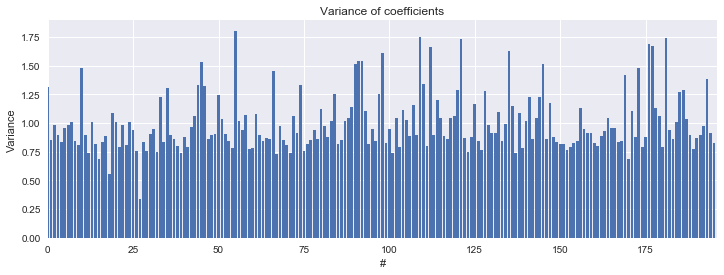

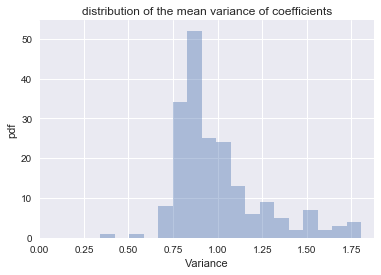

In [6]:
shl = SHL()
data = shl.get_data()
for alpha_homeo in np.logspace(-1, 0.4, N_scan, base=10)*shl.alpha_homeo:
    matname = 'homeo - alpha_homeo={}'.format(alpha_homeo)

    shl = SHL(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, 
              learning_algorithm='mp', alpha_homeo=alpha_homeo, verbose=verbose)

    dico = shl.learn_dico(data=data, matname=matname)
    fig, ax = dico.show_dico(title=matname)
    fig.show()
    fig, ax = dico.plot_variance(data)
    fig.show()
    fig, ax = dico.plot_variance_histogram(data)    
    fig.show()    

## Version used

In [7]:
import version_information
%version_information numpy, shl_scripts